Du doan doanh thu xe hoi trong nam 2013 va dau nam 2014

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('elantra.csv')


In [3]:
df.tail(10)

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
40,10,2012,14512,7.8,257,256.389,231.652
41,10,2013,14876,7.2,223,243.374,233.782
42,11,2010,8631,9.8,161,219.303,219.544
43,11,2011,12414,8.6,255,247.092,227.136
44,11,2012,15923,7.8,246,248.136,231.190
45,11,2013,16751,7.0,231,242.301,234.033
46,12,2010,13096,9.4,170,227.190,220.437
47,12,2011,13025,8.5,253,243.015,227.093
48,12,2012,19024,7.9,275,244.698,231.099
49,12,2013,21692,6.7,279,246.189,234.594


In [4]:
## Xap xep du lieu theo thu tu cac hang du lieu theo thang, nam:
## Dung df.sort_values va df.reset_index

df = df.sort_values(by = ['Year', 'Month']).reset_index(drop = True)



In [5]:
import matplotlib.pyplot as plt



Ve bieu do de truc quan hoa du lieu 

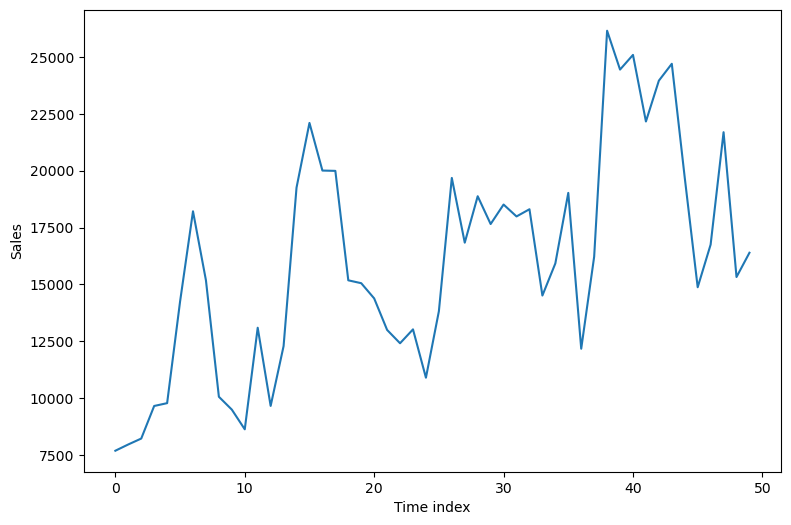

In [6]:
plt.figure(figsize = (9,6))

plt.plot(df.ElantraSales.values)

plt.xlabel('Time index')

plt.ylabel('Sales')

plt.show()

Bo cot ElantraSales, Month Year

In [8]:
numeric_feats = df.columns.drop(["ElantraSales", "Month", "Year"])
numeric_feats

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all'], dtype='object')

Chia tap du lieu:
Train: Nam < 2013
Test: Nam > 2013

In [9]:
df_train = df[df.Year < 2013]
df_test = df[df.Year >= 2013]

y_train = df_train.ElantraSales.values
y_test = df_test.ElantraSales.values


Chuan hoa du lieu bang Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train[numeric_feats])

X_train = scaler.transform(df_train[numeric_feats])
X_test = scaler.transform(df_test[numeric_feats])

Xay dung mo hinh

In [11]:
import sklearn



In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
model1 = LinearRegression()


model1.fit(X_train, y_train)

LinearRegression()

In [14]:
pred = model1.predict(X_test)


4. Danh gia mo hinh

In [15]:
from sklearn.metrics import mean_squared_error

def relative_error(y_true, y_pred):
    errors = np.abs(y_pred - y_true).astype(float)/y_true
    return np.mean(errors)*100



In [16]:
y_pred_test = model1.predict(X_test)

print('RSME: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("Mean relative error: {:.1f}%".format(relative_error(y_test, y_pred_test)))


RSME: 5017.35
Mean relative error: 19.0%


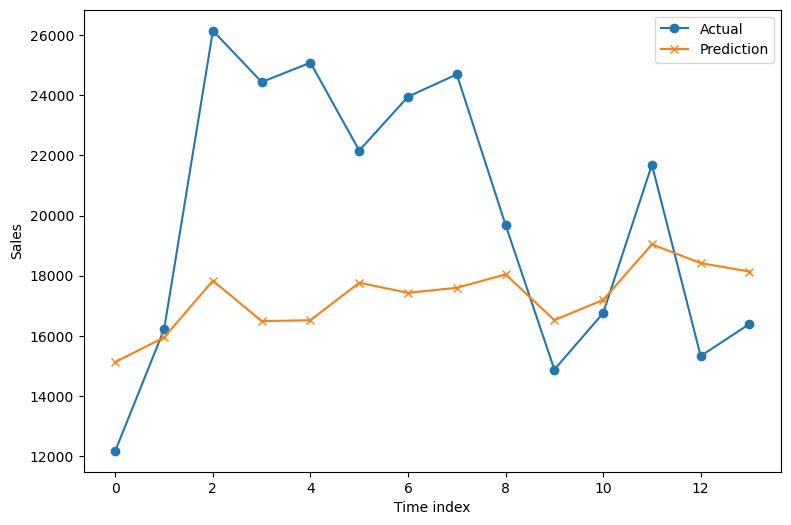

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.plot(y_test, label = 'Actual', marker = 'o')
plt.plot(y_pred_test, label = "Prediction", marker = 'x')
plt.legend()
plt.xlabel('Time index')
plt.ylabel('Sales')

plt.show()

Sai so qua lon giua tap du doan va tap thuc te, can sua lai mo hinh

5. Phuong phap cai tien

In [18]:
## Tap du lieu theo dac trung Month


month_onehot_train = pd.get_dummies(df_train.Month)
month_onehot_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False


Ghep dac trung

In [19]:
X_train = np.hstack((X_train, pd.get_dummies(df_train.Month, prefix='Month')))
X_test = np.hstack((X_test, pd.get_dummies(df_test.Month, prefix='Month')))


In [20]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_test = model2.predict(X_test)

In [22]:
print('RSME: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('Mean relative error: {:.1f}'.format(relative_error(y_test, y_pred_test)))

RSME: 3590.37
Mean relative error: 12.8


Text(0, 0.5, 'Sales')

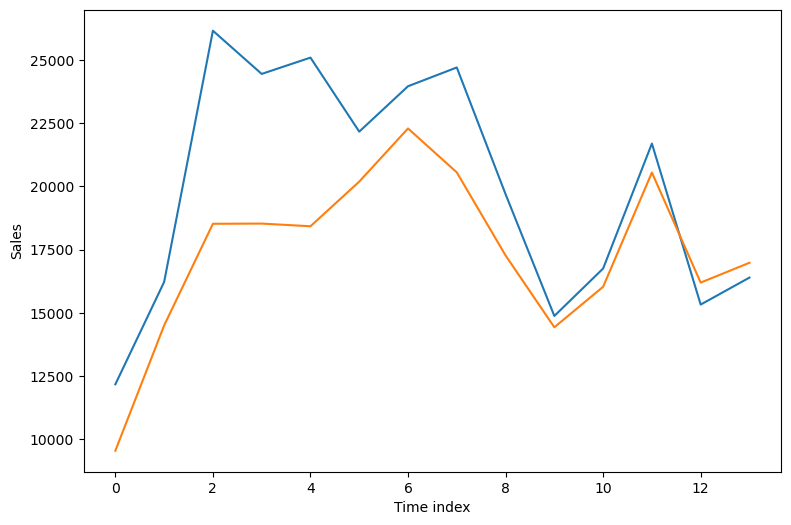

In [23]:
plt.figure(figsize=(9,6))

plt.plot(y_test)

plt.plot(y_pred_test)

plt.xlabel('Time index')

plt.ylabel('Sales')